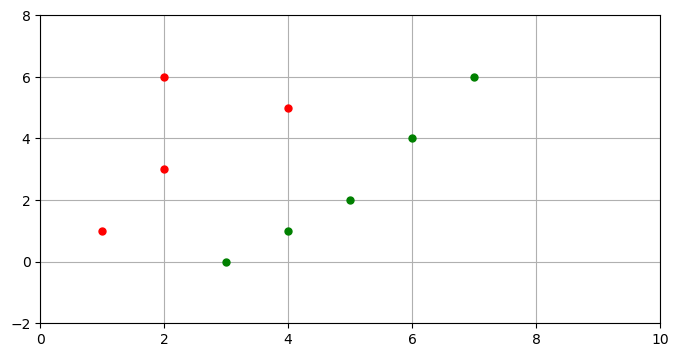

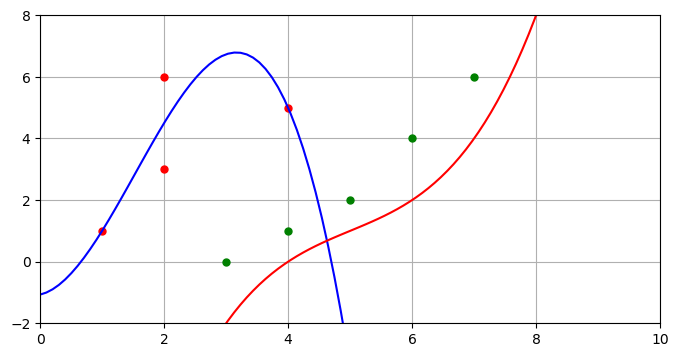

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (win64)
Optimize a model with 0 rows, 8 columns and 0 nonzeros
Model fingerprint: 0x1ff24709
Model has 20 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+01, 4e+03]
  QObjective range [8e+00, 4e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 8 columns, 0 nonzeros
Presolved model has 20 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 14
 AA' NZ     : 6.000e+00
 Factor NZ  : 1.200e+01
 Factor Ops : 2.800e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.28000000e+02  1.28000000e+02  0.00e+00 4.69e+03  0.00e+00     0s
   1   1.24916393e+02  1.27972343e+02  

In [20]:
# define (x,y) coordinates of the points
x = [ 1, 2, 2 ,3, 4,4, 5, 6, 7, 8, 9 ]
y = [ 1, 3, 6 ,0, 1,5, 2, 4, 6, 7, 5 ]

using PyPlot
figure(figsize=(8,4))
plot( x1, y1, "r.", markersize=10)
plot( x2, y2, "g.", markersize=10)
axis([0,10,-2,8])
grid("on")

# order of polynomial to use

x1 = Int64[]
x2 = Int64[]
y1 = Int64[]
y2 = Int64[]
for i=1:n
    if(x[i]==0||x[i]/y[i]<=1)
        push!(x1, x[i])
        push!(y1, y[i])
    elseif(y[i]==0||x[i]/y[i]>=1)
        push!(x2, x[i])
        push!(y2, y[i])
    end
end


k = 3

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n1 = length(x1)
n2 = length(x2)
A = zeros(n1,k+1)
for i = 1:n1
    for j = 1:k+1
        A[i,j] = x1[i]^(k+1-j)
    end
end


B = zeros(n2,k+1)
for l = 1:n2-1
    for j = 1:k+1
        B[l,j] = x2[l+1]^(k+1-j)
    end
end
using JuMP, Gurobi


m = Model(with_optimizer(Gurobi.Optimizer))

@variable(m, u[1:k+1])
@variable(m, v[1:k+1])

@expression(m, MinA, (y1 - (A*u)).^2)
@expression(m, MinB, (y2 - (B*v)).^2)
@objective(m,Min,sum(MinA)+sum(MinB))

optimize!(m)
uopt = value.(u)
sopt=value.(v)
println("uopt DEGERİ",uopt)
println("sopt DEGERİ",sopt)
uopt
using PyPlot
npts = 100
xfine = LinRange(0,10,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfinu = ffine * uopt
yfins = ffine * sopt
figure(figsize=(8,4))
plot( x1, y1, "r.", markersize=10)
plot( x2, y2, "g.", markersize=10)
plot( xfine, yfinu, "b-")
plot( xfine, yfins, "r-")
axis([0,10,-2,8])
grid()